# Final Report

## How Horsepower Varies Based on the Numbers of Cylinders in a Car Engine
 **Authors** Group 14: Sid Ahuja, Tejasvi Kathuria, Xiaoran Fan, Ci Xu

## Introduction

There are many factors that determine the performance of a car. Previous research demonstrates that the engine efficiency is related to the volume and number of the cylinders (Emiroğlu et al., 2018). However, there are few and limited studies on the relationship between the number of cylinders and horsepower. In general, cars with different number of cylinders have different horsepower (Kellermayr et al., 2019). We are interested in the different effects on horsepower between the cars with 4- and 6-cylinder engines. Our question is: "Do cars with 6-cylinder engines on average have higher horsepowers than cars with 4-cylinder engines?" Since we are comparing the average horsepower we will use the sample mean (the location statistics), and the standard deviation (the scale statistics) of the horsepower to observe the spread in horsepower between the different samples.

Based on our question, our competing hypotheses are (where μ represents the average horsepower):
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines in cars from 1970-1982 (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines in cars from 1970-1982 (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

We'll conduct our analysis with an alpha value of 0.05, such that our test is relatively not too conservative nor too liberal.

Our data set is the Auto MPG data set, which was obtained from Carnegie Mellon University's StatLib library. The 1983 American Statistical Association Exposition made use of this dataset. 

Attribute information:

|Variables|Attribute|
|:---:|:---:|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|

*Table 1: Variable Attributes of Car Data*

## Method And Results

This report utilizes a large sample of 4- and 6-cylindered engine cars from 1970-1982. Using this large sample and proper statistical inference methods, we can make estimates, test the hypotheses, and come to conclusions with a high degree of reliability and credibility.

However, even though we can make some preliminary calculations and estimations of certain parameters, we can not use these initial point estimates to come to any final conclusions because they just concern the sample and may or may not make accurate predictions about the population. To incorporate accuracy and precision in our report, we have to find the confidence interval to estimate the population parameter, and conduct a hypothesis test to see if we should reject or not reject the null hypothesis.

### Preliminary Results

#### Loading Required Packages and Setting Seed

In [37]:
library(tidyverse)
library(infer)
library(repr)
library(dplyr)
library(broom)

In [38]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

cars <- read.table("auto-mpg.data") 
head(cars)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


*Table 2: Raw data loaded from the internet*

#### Cleaning and Wrangling the Data

Renaming the variables and cleaning the data. The horsepower is changed into a numeric variable, and the number of cylinders is changed into a categorical variable.

In [39]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders))
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,dispacement,horsepower,weight,acceleration,model,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


*Table 3: Data table with correct headings*

We delete the null values in the `horsepower` column and filter for the cylinder numbers we want to analyze. We then select the columns relevant to our study.

In [40]:
cars_variables <- cars %>% 
    filter(!is.na(horsepower),
           cylinders %in% c(6,4))%>%
    select(cylinders, horsepower)
head(cars_variables)

,cylinders,horsepower
,<fct>,<dbl>
1,4,95
2,6,95
3,6,97
4,6,85
5,4,88
6,4,46


*Table 4: Filtered and cleaned data required to answer question*

#### Summary of Statistics

Next, we calculate the test statistics of multiple parameters and present them in the table shown below.

In [41]:
cars_summ_hp <- cars_variables %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))
cars_summ_hp

cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


*Table 5: Summary of statistics*

#### Plotting Relavent Data

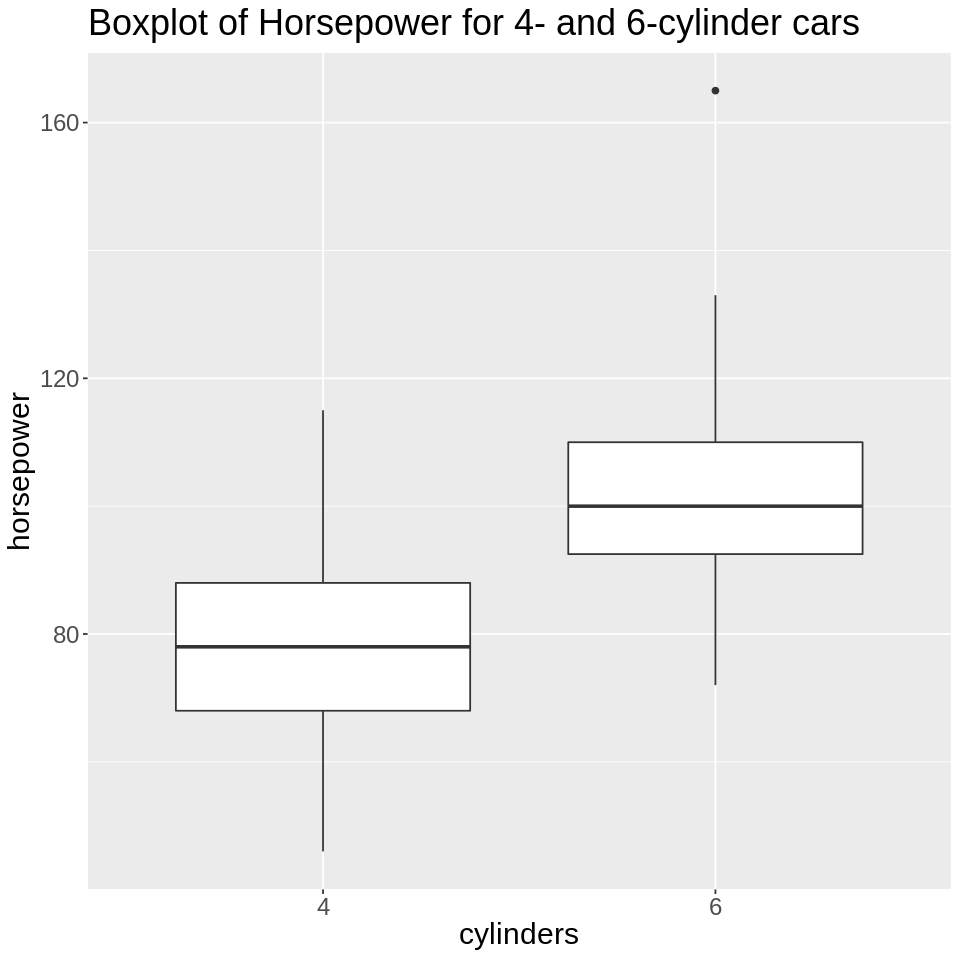

In [42]:
options(repr.plot.width = 8, repr.plot.height = 8)

cars_boxplot <- cars_variables %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()+
    ggtitle("Boxplot of Horsepower for 4- and 6-cylinder cars") +
    theme(text = element_text(size = 18))

cars_boxplot

*Figure 1: Boxplot of Horsepower for 4- and 6-cylinder cars in the sample*

From both Table 5 and Figure 1, we can see that that the standard deviation of horsepower for 4 cylinders is similar to the standard deviation of horsepower for 6 cylinders (they have a similar spread). We can also see that the sample's average horsepower of 6 cylinder engines is greater than the average horsepower of 4 cylinder engines which suggests a difference; however, the overlap between the boxplots is of some concern and requires further testing to test whether a difference actually exists between both populations. 

### Finding Confidence Intervals through Bootstrapping

With these preliminary results, we move on to the next part of analysis by using the simulation based method of bootstrapping to find the confidence interval of our samples. We use simulation based methods rather than theory based methods because there are no assumptions being made (reduces uncertainty) and we have a large enough sample size (theory based methods are not required). We have to find the 95% confidence interval because we're doing a one-tailed test and the alpha level is at 5%.

**4 Cylinder Cars**
- Sample mean marked in red
- 95% confidence interval boundaries shaded in green

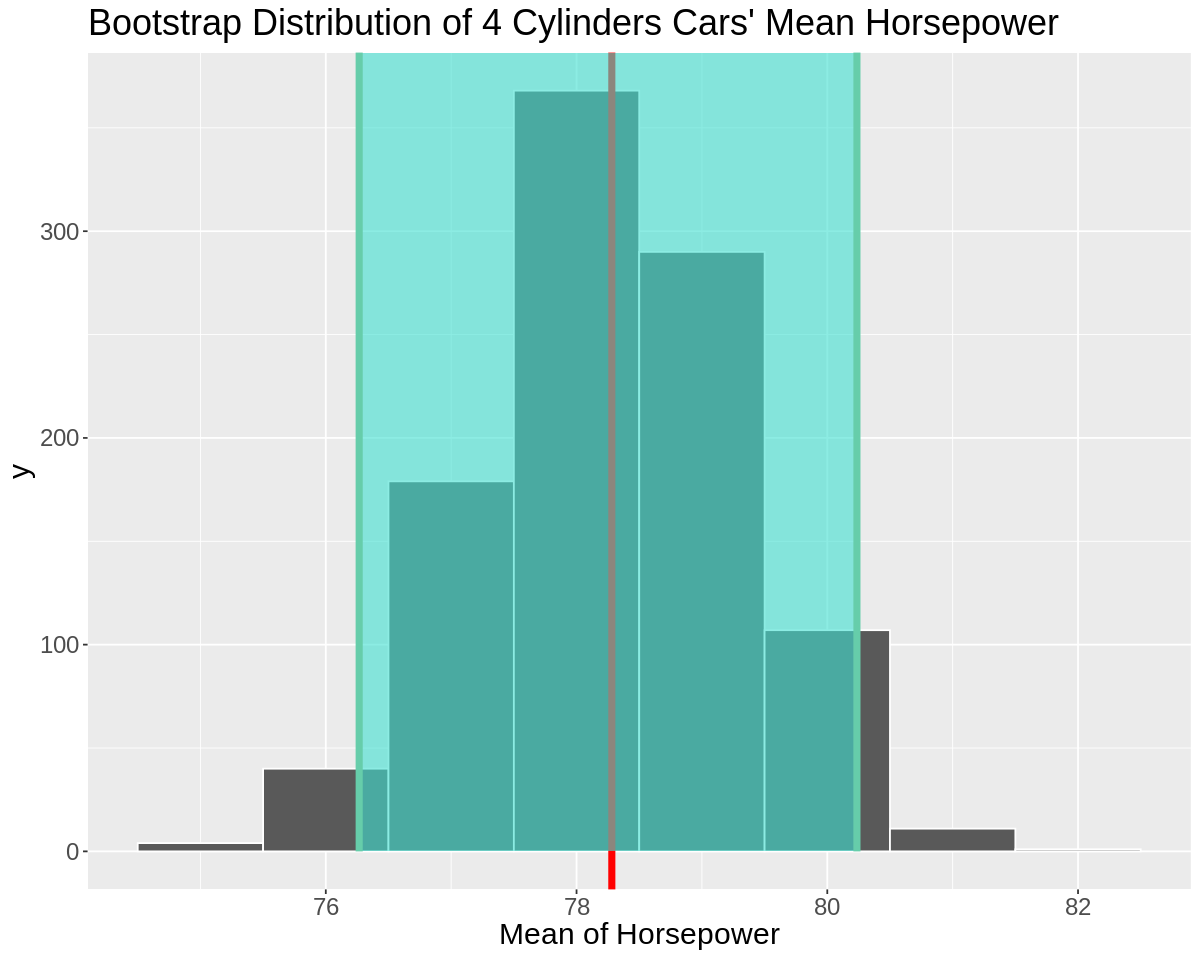

In [53]:
set.seed(1234)
options(repr.plot.width = 10, repr.plot.height = 8)

cars_bootstrapped1 <- cars_variables %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.95, type = "percentile")
    

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_summ_hp[[1,3]], color = "red", size = 2) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower") +
    theme(text = element_text(size = 18)) +
    shade_confidence_interval(endpoints = cars_ci1)
cars_4cylinders_plot

*Figure 2: Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower with 95% Confidence Interval*

**6 Cylinder Cars**
- Sample mean marked in red
- 95% confidence interval boundaries shaded in green

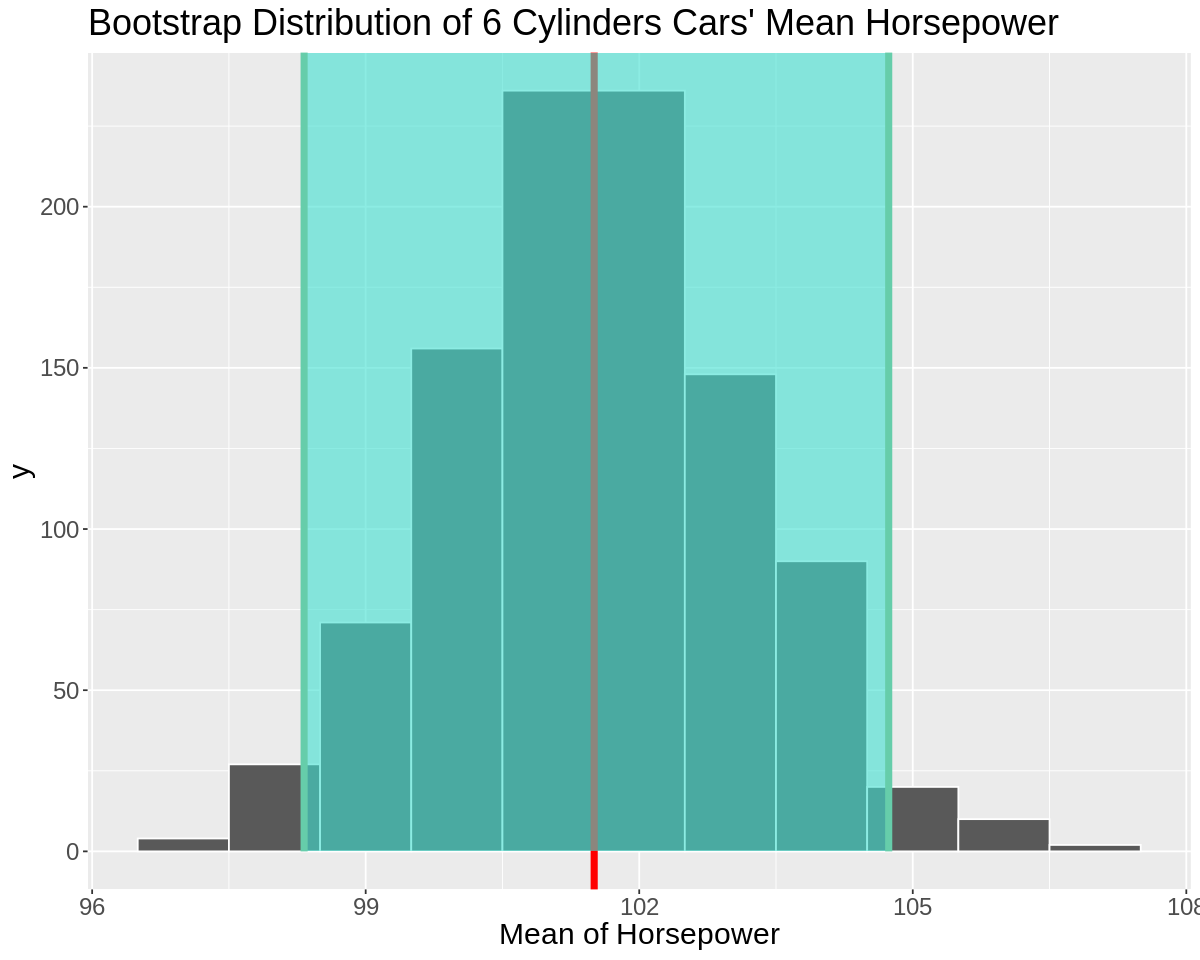

In [44]:
set.seed(1234)
options(repr.plot.width = 10, repr.plot.height = 8)

cars_bootstrapped2 <- cars_variables %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.95, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_summ_hp[[2,3]], color = "red", size = 2) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower") +
    theme(text = element_text(size = 18)) +
    shade_confidence_interval(endpoints = cars_ci2)

cars_6cylinders_plot

*Figure 3: Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower with 95% Confidence Interval*

In [52]:
cylinders <- c(4,6)
ci <- rbind(cars_ci1, cars_ci2)
ci <- cbind(cylinders, ci)
ci

cylinders,lower_ci,upper_ci
<dbl>,<dbl>,<dbl>
4,76.26633,80.23643
6,98.32470,104.73614


*Table 6: Upper and Lower Boundaries of the Confidence interval for 4- and 6-cylinder cars*

In the table above, we are 95% confident that the true mean horsepower of the population lies in between the specified boundaries. The confidence interval of the 4 cylinder bootstrap distribution is smaller than the confidence interval of the 6 cylinder bootstrap distribution, even though they had rougly the same standard deviation. This is due to the difference in sample size as with a larger sample size, the confidence interval becomes tighter with a smaller margin of error.

### Hypothesis Testing

Finally, to answer our question, we have to use hypothesis testing and compare our observed test statistic (**difference in means**) with the null hypothesis model. We will conduct this hypothesis test using both a simulation based approach (infer package) and a theory based approach (t-test), and then we will compare our findings from both tests. We are able to use theory based approaches because our sample is in accordance with the assumptions of the Central Limiting Theorum.

To recall, our hypotheses are:
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines in cars from 1970-1982 (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines in cars from 1970-1982 (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

#### Simulation Based Hypothesis Test

Here we use the infer package framework to calculate the p-value of our test statistic which will determine if we reject or fail to reject the null hypothesis.

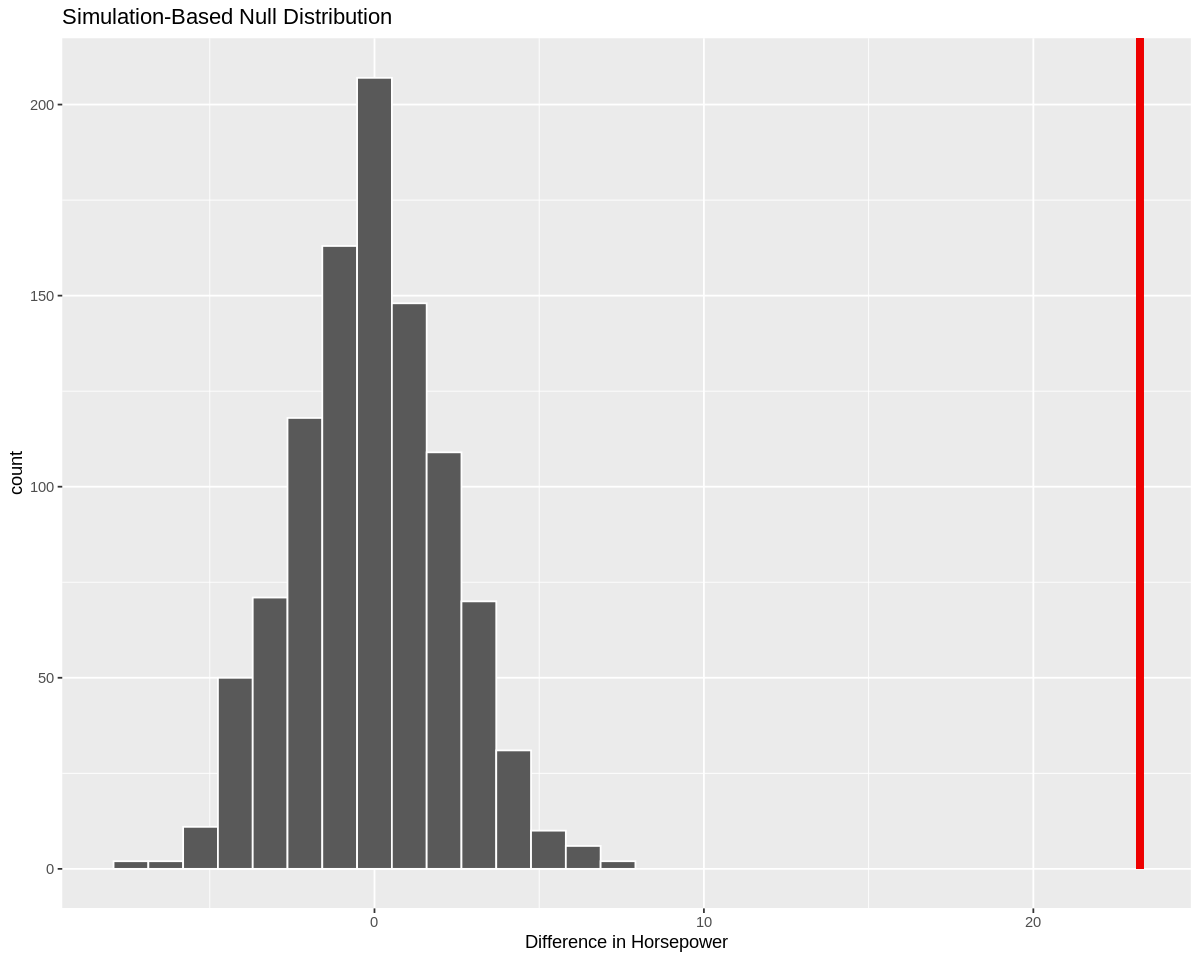

In [46]:
set.seed(1234)
obs_test_stat <- cars_variables %>% 
  specify(formula = horsepower ~ cylinders) %>% 
  calculate(stat = "diff in means", order = c("6", "4"))

diff_in_means <- cars_variables %>%
    specify(formula = horsepower ~ cylinders) %>% 
    hypothesize(null = 'independence') %>%
    generate(reps = 1000, type = 'permute') %>%
    calculate(stat = "diff in means", order = c("6", "4")) 

vis_p_value <- diff_in_means %>%
    visualize(binwidth = 1) +
    shade_p_value(obs_stat = obs_test_stat, direction = "right")+
    xlab("Difference in Horsepower")
vis_p_value

*Figure 4: Simulation Based Null Distribution and Observed Test Statistic (in red)*

In [47]:
infer_p_value <- diff_in_means %>%
    get_p_value(obs_stat = obs_test_stat, direction = "right")
infer_p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


*Table 7: P-value generated by simulation based hypothesis test*

The p-value generated here is an approximation based on the number of `reps` chosen in the `generate()` function. The p-value is so small that it gets rounded (based on the number of replicates) and is reported here as 0, however, we cannot have a p-value of 0 because without access to the population, we cannot report with 100% certainty that our observed test statistic never occurs. So we say that the p-value < 0.001 which is smaller than our alpha value of 0.05. This means we reject the null hypothesis and conclude that on average, 6-cylinder cars from 1970-1982 have a greater horsepower than 4-cylinder cars from 1970-1982.

#### Theory Based Hypothesis Test (using formulas)

We start by selecting the required columns for a t-test from our summary of statistics.

In [48]:
cars_summ_hp_select <- cars_summ_hp %>%
    select(cylinders, size, mean, sd)
cars_summ_hp_select

cylinders,size,mean,sd
<fct>,<int>,<dbl>,<dbl>
4,199,78.28141,14.52310
6,83,101.50602,14.31047


*Table 8: Summary of sample size, mean and standard deviation for both cylinder types*

The two samples are independent and so we will be using the t-test for Two Independent Population Difference in Means. We require the variables listed below in order to calculate the test statistic and degrees of freedom of our t-distribution. The formulas listed below are used to calculate said values. These values will then be used to find the p-value of our test statistic which will then help us reject or fail to reject the null hypothesis.

- x_bar : mean horsepower of cars with 6 cylinders

- y_bar : mean horsepower of cars with 4 cylinders

- sd1 : standard deviation of cars with 6 cylinders

- sd2 : standard deviation of cars with 4 cylinders

- n1 : sample size of cars with 6 cylinders

- n2 : sample size of cars with 4 cylinders

Test Statistic: 

$$
T = \frac{\bar{x}-\bar{y}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

We use Table 8 to get the required values.

In [49]:
x_bar1 <- cars_summ_hp_select$mean[2]
x_bar2 <- cars_summ_hp_select$mean[1]
n1 <- cars_summ_hp_select$size[2]
n2 <- cars_summ_hp_select$size[1]
sd1 <- cars_summ_hp_select$sd[2]
sd2 <- cars_summ_hp_select$sd[1]
test_statistic <- (x_bar1 - x_bar2)/sqrt(sd1^2/n1+sd2^2/n2)
paste0("Test Statistic: ", test_statistic)

df <- (sd1^2/n1 + sd2^2/n2)^2/(sd1^4/(n1^2*(n1-1)) + sd2^4/(n2^2*(n2-1)))
paste0("Degrees of Freedom: ", df)

p_val <- pt(test_statistic, df, lower.tail = FALSE)
paste0("P-Value: ", p_val)

[1] "Test Statistic: 12.3660409562759"

[1] "Degrees of Freedom: 155.683680500782"

[1] "P-Value: 3.33108747457776e-25"

By using theory based formulas and making assumptions about our data, we find that the average difference between 6-cylinder and 4-cylinder car horsepowers is 12.37 and that the null distribution follows a t distribution with 155.68 degrees of freedom. With both these values, we calculate the p-value to be 3.33 x 10^(-25) which is smaller than our alpha value of 0.05. This means we reject the null hypothesis and conclude that on average, 6-cylinder cars from 1970-1982 have a greater horsepower than 4-cylinder cars from 1970-1982.

#### Theory Based Hypothesis Test (using R based function)

Rather than doing the calculations by hand in a step-by-step process, we can use the `t.test` function to generate a table containing the test statistic, degrees of freedom, and p-value.

In [50]:
tidy(
        t.test(x = cars_variables %>% 
               filter(cylinders == "6") %>% 
               pull(horsepower),
               y = cars_variables %>% 
               filter(cylinders == "4") %>% 
               pull(horsepower),
               alternative = "greater"))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
23.22462,101.506,78.28141,12.36604,3.331087e-25,155.6837,20.11693,Inf,Welch Two Sample t-test,greater


*Table 9: T-Test table*

The test statistic (`statistic`), degrees of freedom (`parameter`), and p-value (`p.value`) all have the same values as the formula based calculations above. This helps us verify our work and conclude that on average, 6-cylinder cars from 1970-1982 have a greater horsepower than 4-cylinder cars from 1970-1982 (rejecting the null hypothesis again).

#### Comparison of Tests

Both the simulation based test and theory based test resulted in the same conclusion, where we reject the null hypothesis. The simulation based test was much more straight forward and did not make any assumptions about the data. However, the simulation based approach forced us to round the very small p-value to 0 due the number of replicates we specified in the code. This is one limitation of the simulation based test. On the other hand, the theory based approach provided us with a non-zero p-value but also relied on several assumptions and estimations regarding the data. In our case, these assumptions held true but in other tests, assumptions about the sample or test statistic may not hold true. These are the advantages and limitations of using a theory based test.

## Discussion

In our analysis, we found that after conducting a hypothesis test for observing the average difference in horsepower between 4- and 6-cylinder engines in cars from 1970-1982 at a 5% significance level,  6-cylinder cars from 1970-1982 have a greater horsepower than 4-cylinder cars from 1970-1982. We conducted the analysis using bootstrapping and asymptotics, and ultimately ended up with similar results. Neither of the tests were found to be more appropriate than the other since our data met the requirements for both test types.

Generally, the more cylinders an engine has, the more horsepower it can generate. With 6-cylinder cars having 50% more cylinders than 4-cylinder cars we would expect them to be more powerful and have more horsepower. This can be seen formally and with more conviction in the confidence intervals computed via bootstrapping with the mean horsepower of 4-cylinder cars being somewhere between approximately 76-80 while for 6-cylinder cars the mean lying between approximately 98-104. After being able to reject the null hypothesis using the simulation and theory based hypothesis tests we can be sure that the results of the study aligned with the results that we expected to find. Additionally, returning to our initial point about the difference of 50% more cylinders in the two samples, it would be interesting to see if the horsepower also varies by 50% i.e if the 6-cylinder cars have 50% more horsepower than the 4-cylinder cars for future research.

## References

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository http://archive.ics.uci.edu/ml. Irvine, CA: University of California, School of Information and Computer Science.

Emiroğlu, A. O., & Şen, M. (2018). Combustion, performance and emission characteristics of various alcohol blends in a single cylinder diesel engine. Fuel, 212, 34–40. https://doi.org/10.1016/j.fuel.2017.10.016 

Kellermayr, G., Schutting, E., &amp; Mitterecker, H. (2019). Turbocharging of engines with low cylinder numbers: A thermodynamic consideration. Automotive and Engine Technology, 4(3-4), 153–167. https://doi.org/10.1007/s41104-019-00048-8 